In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coke=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")

In [3]:
coke.shape

(42, 2)

In [4]:
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
coke['Quarters'] = 0
coke['Year'] = 0
for i in range(42):
    a = coke["Quarter"][i]
    coke['Quarters'][i]= a[0:2]
    coke['Year'][i]= a[3:5]

<ipython-input-5-6b9936fbd2bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coke['Quarters'][i]= a[0:2]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-5-6b9936fbd2bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coke['Year'][i]= a[3:5]


In [6]:
coke.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [7]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


In [8]:
qd = pd.DataFrame(pd.get_dummies(coke['Quarters']))
coke = pd.concat([coke,qd],axis = 1)
coke.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


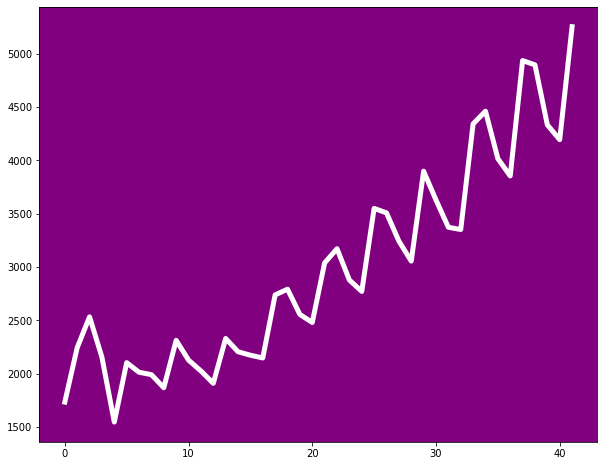

In [9]:
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.set_facecolor("purple")
plt.plot(coke['Sales'], color = 'white', linewidth=5)

<AxesSubplot:>

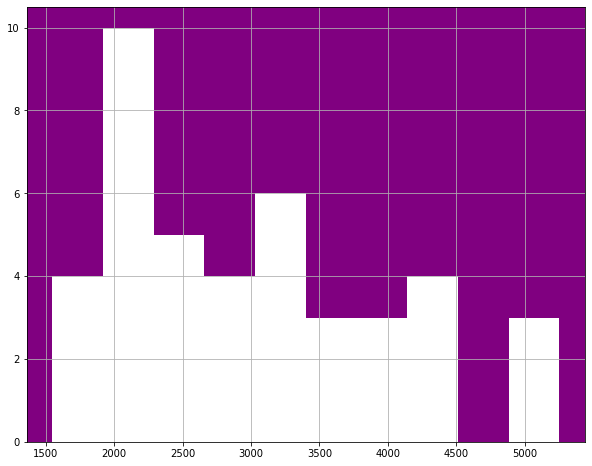

In [10]:
ax = plt.axes()
ax.set_facecolor("purple")
coke['Sales'].hist(figsize=(10,8), color = 'white')

<AxesSubplot:ylabel='Density'>

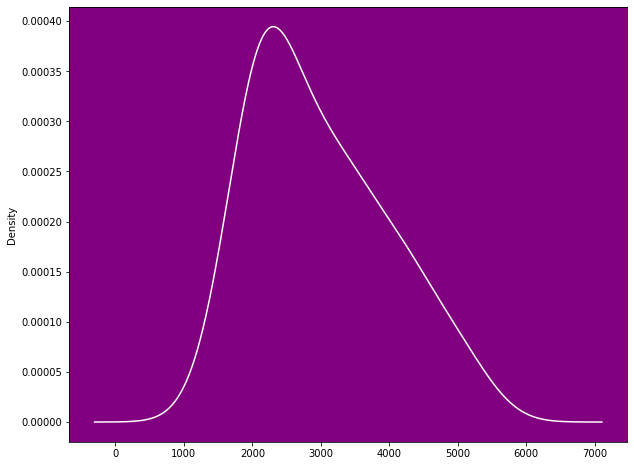

In [11]:
ax=plt.axes()
ax.set_facecolor("purple")
coke['Sales'].plot(kind = 'kde', figsize=(10,8), color = 'white')

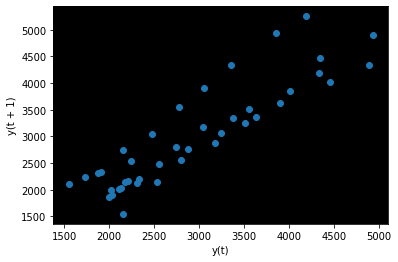

In [12]:
from pandas.plotting import lag_plot
ax = plt.axes()
lag_plot(coke['Sales'])
ax.set_facecolor("black")
plt.show()

**quarters Vs sales**

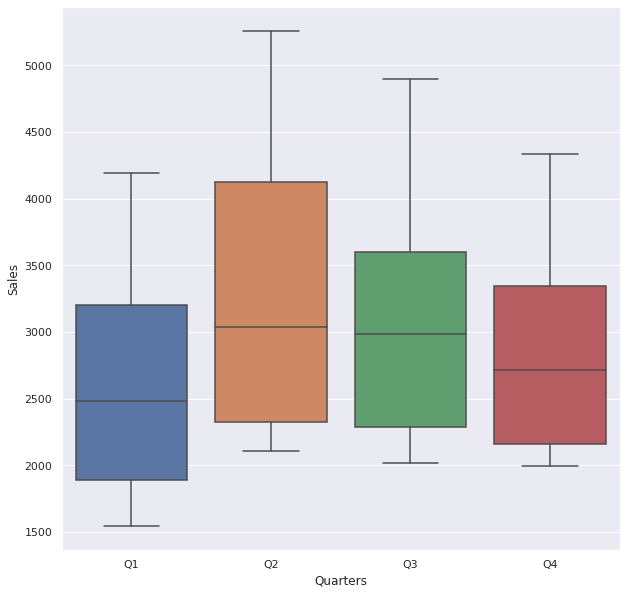

In [13]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x="Quarters",y="Sales",data=coke)
ax.set_facecolor("red")
plt.show()

**years Vs sales**

<AxesSubplot:xlabel='Year', ylabel='Sales'>

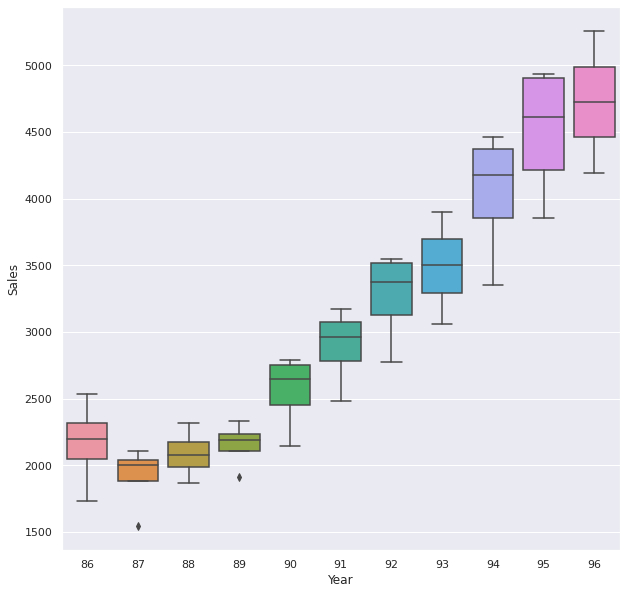

In [14]:
sns.boxplot(x="Year",y="Sales",data=coke)

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

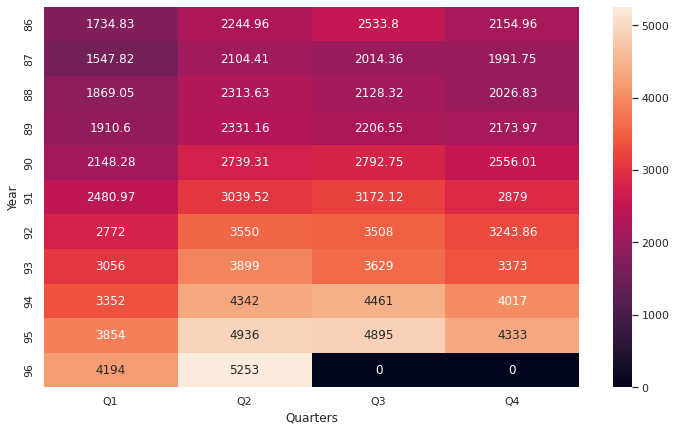

In [15]:
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=coke,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

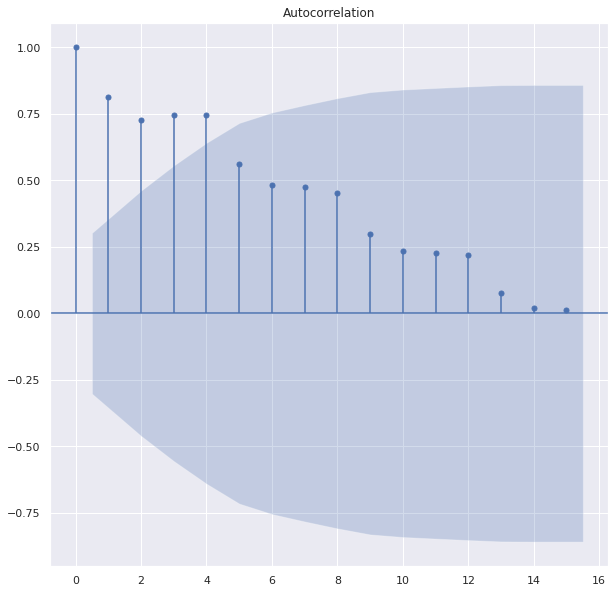

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales,lags=15)
plt.show()

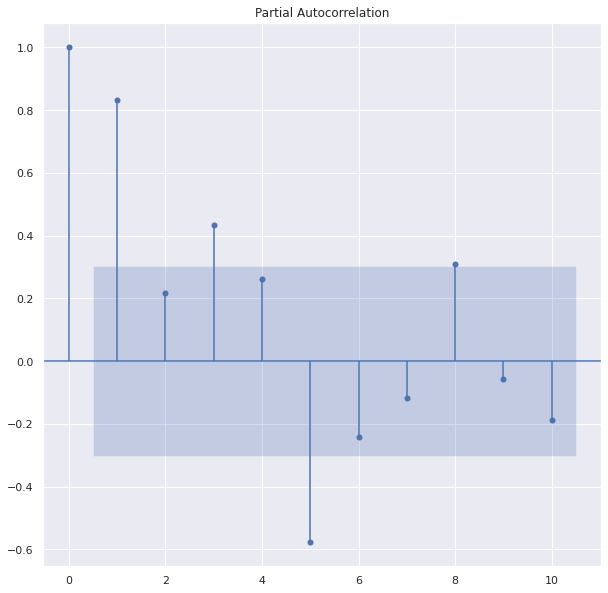

In [17]:
tsa_plots.plot_pacf(coke.Sales,lags=10)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Sales'>

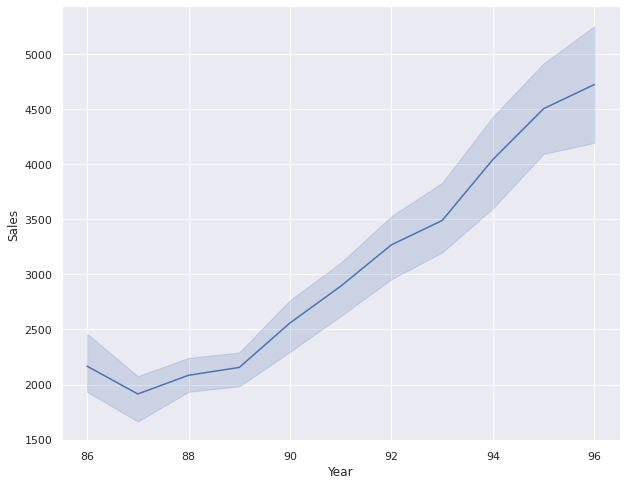

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Year",y="Sales",data=coke)

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
Train = coke.head(32)
Test = coke.tail(10)

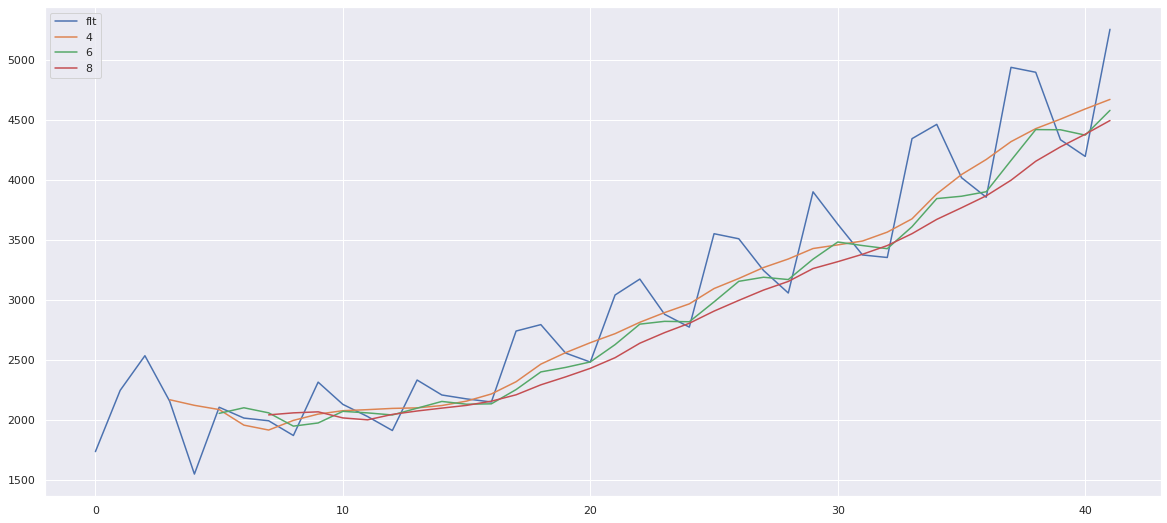

In [21]:
plt.figure(figsize=(20,9))
coke.Sales.plot(label="flt")
for i in range(4,10,2):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

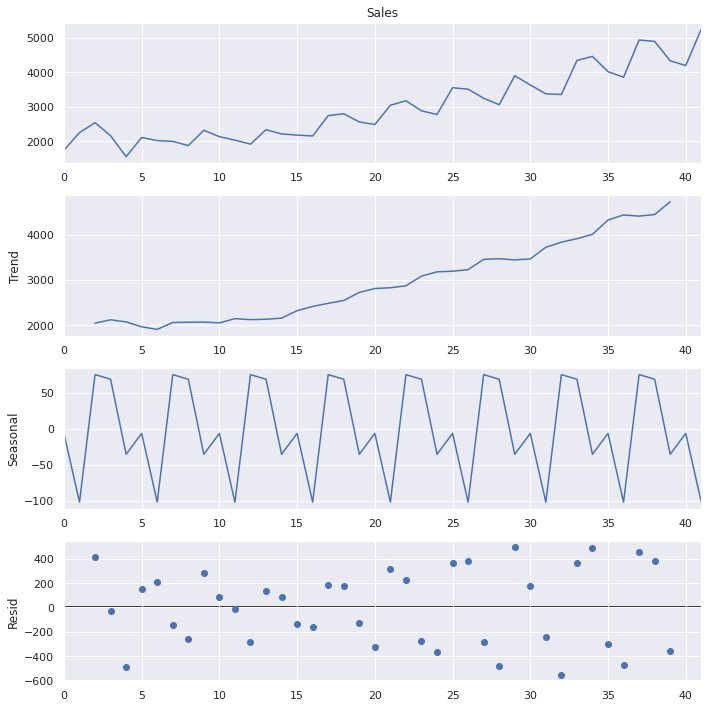

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(coke.Sales,period=5)
decompose.plot()
plt.show()

In [23]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [24]:
ses_m = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses =ses_m.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_m =RMSE(Test.Sales, pred_ses)
rmse_ses_m

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


1034.9359056453961

In [25]:
hst_m = Holt(Train["Sales"]).fit()
pred_hst = hst_m.predict(start = Test.index[0],end = Test.index[-1])
rmse_hst_m = RMSE(Test.Sales, pred_hst)
rmse_hst_m

941.6367810616845

In [26]:
hwe_model_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add = hwe_model_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_m = RMSE(Test.Sales, pred_hwe_add)
rmse_hwe_add_m

522.8405512059857

In [27]:
hwe_model_mul = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul = hwe_model_mul.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_m = RMSE(Test.Sales, pred_hwe_mul)
rmse_hwe_mul_m

551.239511691846

In [28]:
coke["t"] = np.arange(1,43)
coke["t_squared"] = coke["t"]*coke["t"]
coke["log_sales"] = np.log(coke["Sales"])
coke.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [29]:
Train = coke.head(32)
Test = coke.tail(10)

In [30]:
import statsmodels.formula.api as smf 

lm = smf.ols('Sales~t',data=Train).fit()
pred_l =  pd.Series(lm.predict(pd.DataFrame(Test['t'])))
rmse_lm = RMSE(Test['Sales'], pred_l)
rmse_lm

752.9233932767116

In [31]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Expm = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Expm

590.3316432076487

In [32]:
quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_quad = pd.Series(quad.predict(Test[["t","t_squared"]]))
rmse_quadm = RMSE(Test['Sales'], pred_quad)
rmse_quadm

457.735735540752

In [33]:
add_season = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_season = pd.Series(add_season.predict(Test[['Q1','Q2','Q3']]))
rmse_add_season = RMSE(Test['Sales'], pred_add_season)
rmse_add_season

1850.466546185836

In [34]:
add_sea_quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad_m = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_quad_m 

277.3510771128639

In [35]:
mul_season = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_mult_season = pd.Series(mul_season.predict(Test))
rmse_mul_season = RMSE(Test['Sales'], np.exp(pred_mult_season))
rmse_mul_season

1908.2503948361164

In [36]:
mul_Add_season = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_mult_add_season = pd.Series(mul_Add_season.predict(Test))
rmse_mul_Add_season = RMSE(Test['Sales'], np.exp(pred_mult_add_season))
rmse_mul_Add_season

448.86781826918514

In [37]:
list = [[' Exponential Method',rmse_ses_m], ['Holt method',rmse_hst_m],
          ['exp smoothing add',rmse_hwe_add_m],['exp smoothing mult',rmse_hwe_mul_m],
          ['Linear Model',rmse_lm],['Exp model',rmse_Expm],['Quad model',rmse_quadm],
          ['add seasonality',rmse_add_season],['Quad add seasonality',rmse_add_sea_quad_m],
          ['Multi Seasonality',rmse_mul_season],['Multi add seasonality',rmse_mul_Add_season]]

In [38]:
coke2=pd.DataFrame(list,columns=['Model','RMSE_Value'])
coke2

,Model,RMSE_Value
0,Exponential Method,1034.935906
1,Holt method,941.636781
2,exp smoothing add,522.840551
3,exp smoothing mult,551.239512
4,Linear Model,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Multi Seasonality,1908.250395


**AMONG THE ABOVE MODELS ADDITIVE SEASONALITY  QUADRATIC MODEL HAVE LEAST RMSE VALUE SO ARIMA VALUE CAN BE PREFERED THAN OTHER MODELS**

In [39]:
coke.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [40]:
fm = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=coke).fit()
pred_final = pd.Series(fm.predict(coke[['Q1','Q2','Q3','t','t_squared']]))
rmse_fm = RMSE(coke['Sales'], pred_final)
rmse_fm

159.0552257652248

In [41]:
pred_coke = pd.DataFrame({'Actual':coke.Sales, 'Predicted' : pred_final})
pred_coke

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


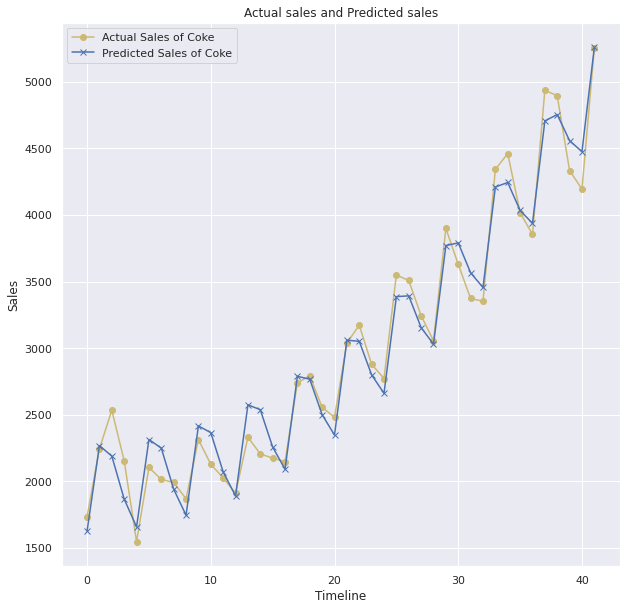

In [42]:
plt.plot(coke.Sales, color='y',marker='o', label='Actual Sales of Coke')
plt.plot(pred_final, color='b',marker='x', label='Predicted Sales of Coke')
plt.title('Actual sales and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (15,10) 
plt.show()